# **Business case : Aerofit**

---





 **About Aerofit :**  

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.

 **Business Problem :**

The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.*italicized text*

# **Dataset**


The company collected the data on individuals who purchased a treadmill from the AeroFit
stores during the prior three months. The dataset has the following features:
Dataset link: Aerofit_treadmill.csv
(https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadm
1639992749)

**Product Purchased:** KP281, KP481, or KP781

**Age:** In years

**Gender:** Male/Female

**Education:** In years

**MaritalStatus:** Single or partnered

**Usage:** The average number of times the customer plans to use the treadmill each week.

**Income:** Annual income (in $)

**Fitness:** Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent

**Miles:** The average number of miles the customer expects to walk/run each week

# **Data** **Analysis**

In [ ]:
#import the required libraries for data analysis.
#basic data analysis checking the structure, characteristics.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

In [ ]:
#Download the given dataset.
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 23.7MB/s]


In [ ]:
#Read the data
data=pd.read_csv('aerofit_treadmill.csv?1639992749')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
#No. of rows and columns in the data
data.shape

(180, 9)

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
#Info extraction of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#statistical information of data
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
print(data.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object




---


**Observations:**

From above code we can have a basic analysis of our data.


*   I have imported the required libraries for analysis
*   data.shape() gives no. of rows and columns are 180 and 9.
*   The data.info()function gives you a quick idea about data like summary. what kind of data each column holds (numbers, text, etc.), and if any values are missing from those columns.
*  There are no null values.
*  The data types of the data are integer and object(String).


*   data.describe() gives stats for numbers in the table.
*   The data is about people aged 18-50, with schooling from 12 to 21 years, and earnings between $29, 562  and $104,581.


---





















#**Non-Graphical Analysis**

In [ ]:
#Frequency analysis
data["Age"].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [ ]:
data["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
data["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
#differect attribute count
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
#Types of products
data['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [ ]:
#Number of customers used the three types of products
customerCount = data['Product'].value_counts()
customerCount.sort_index ()
customerCount

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:

data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:

data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [ ]:

data['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])



---


**Observations :**
From the above frequency analysis,

*   Age : Median age is 25 years, maximum age of 50 years and minimum age of 18 years.
*   There are more number of male users compared to females.
*   Mostly the customers who purchased treadmills fall under fitness scale of 3.
*  Couples purchased more treadmills than singles.


---



In [ ]:
#Missing values
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:

data.duplicated().sum()

0

There are no missing values and no duplicates.

# **Visual Analysis**

## **Correlation Analysis**

<ipython-input-68-a0765374b867>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')


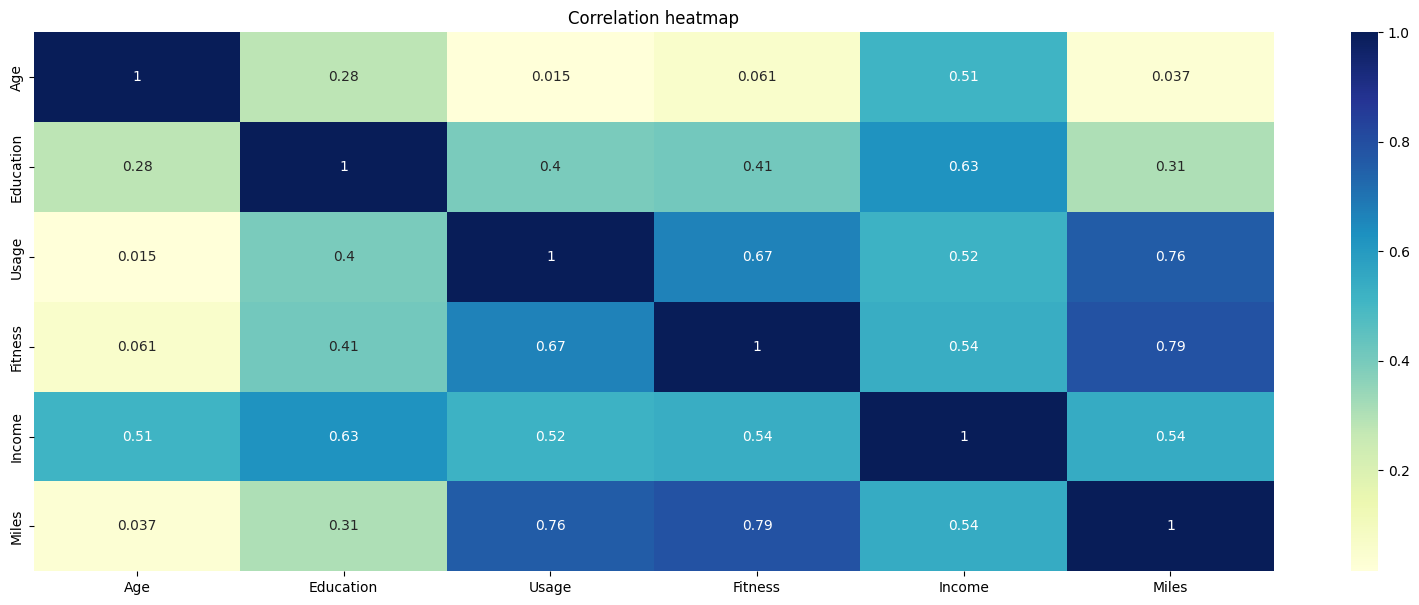

In [ ]:
#heatmap
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation heatmap')
plt.show()


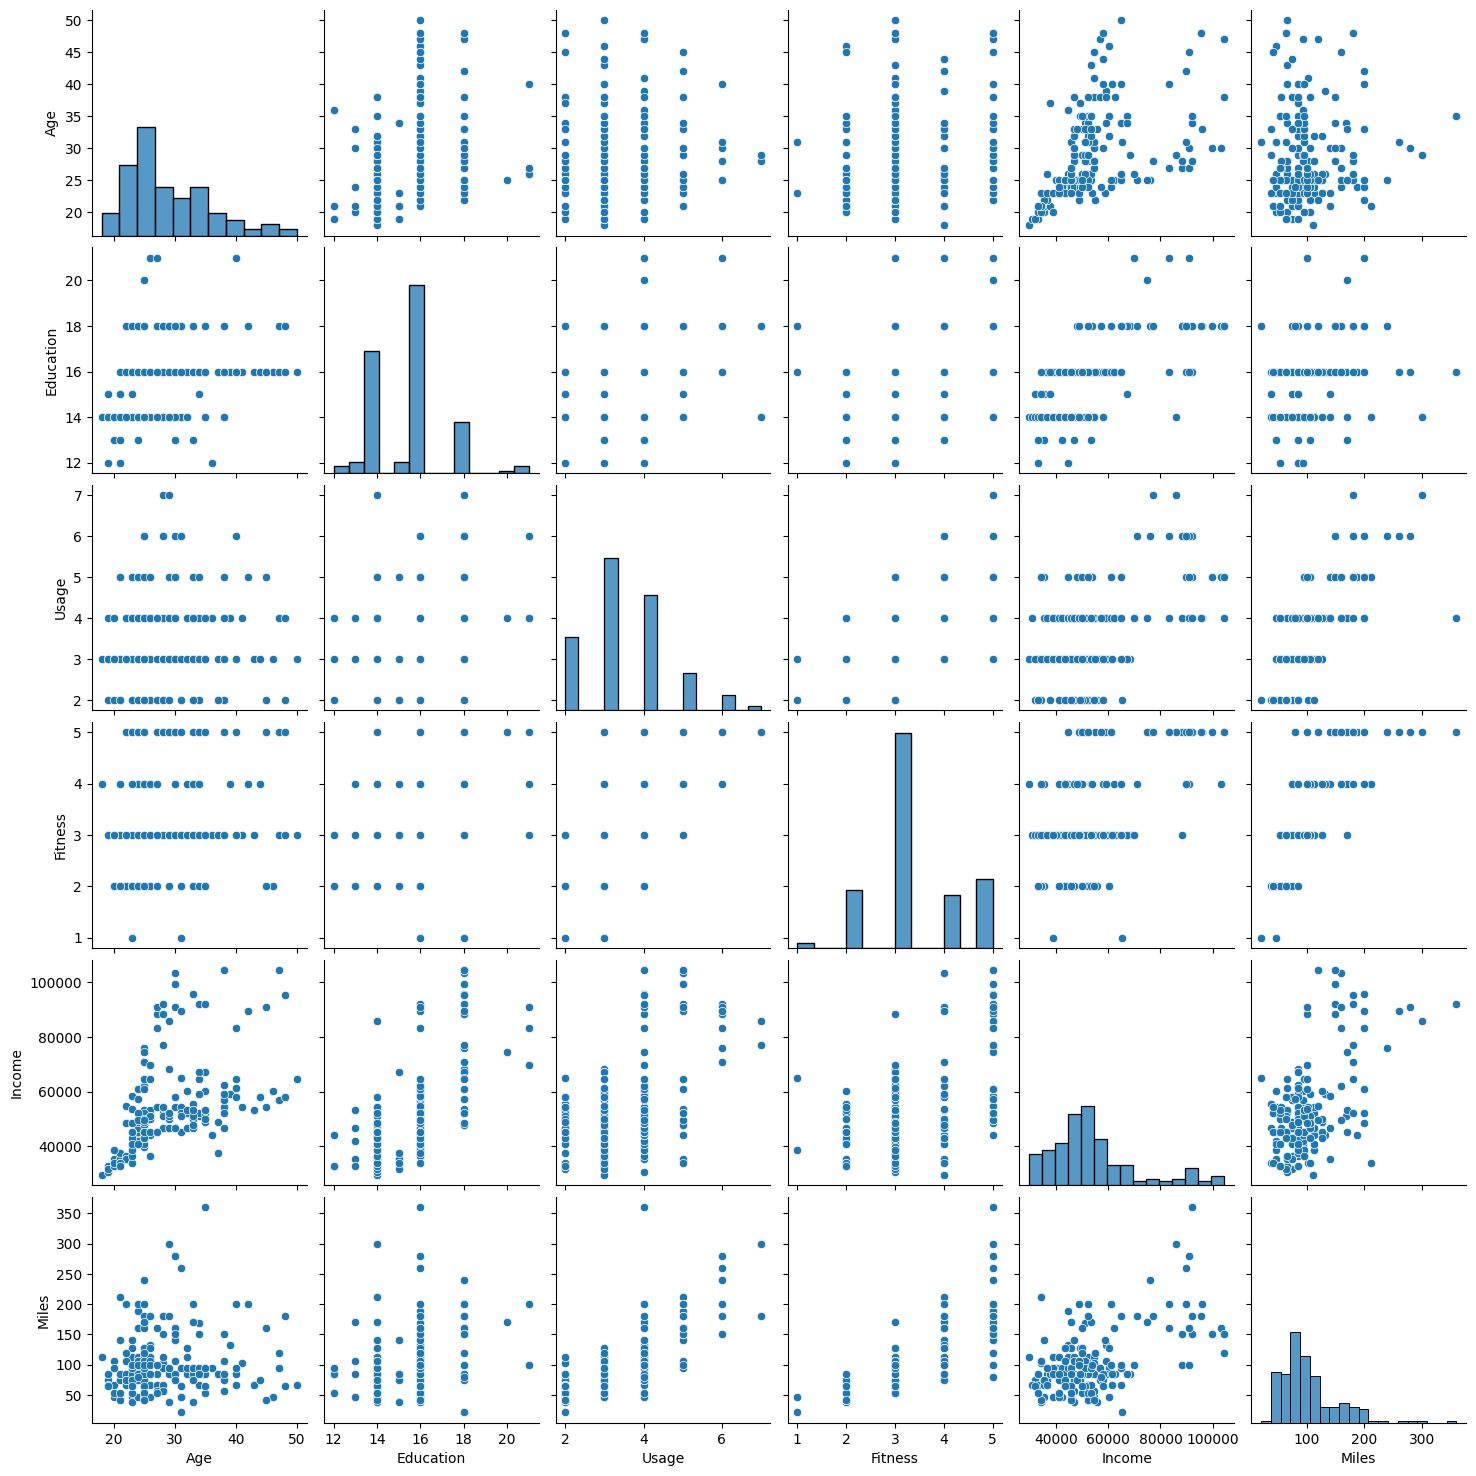

In [ ]:
#pairplot
sns.pairplot(data)
plt.show()


**Observations:**
from both visualizations,
1. Pearson co-efficient is used to evalute the correlation between numerical data points.
2. Pearson evalutes the linear relationship between data points.

Observations which are higher than 0.5.

- Correlation between Income & Miles is 0.54.
- Correlation between Age & Income is 0.51
- Correlation between Usage & Fitness is 0.67.
- Correlation between Usage & Miles is 0.76.
- Correlation between Education & Income is 0.63.
- Correlation between Fitness & Miles is 0.79.
- Correlation between Usage & Income is 0.52.
- Correlation between Fitness & Income is 0.54.

## **Bivariate**


<Axes: xlabel='Product', ylabel='Count'>

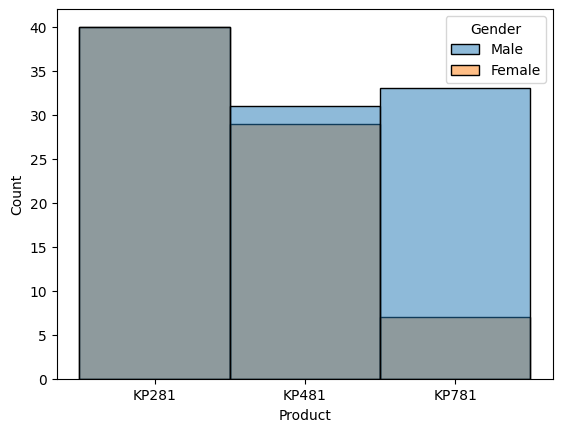

In [ ]:
#Bivariate using histplot
#Analysis among product and Gender
sns.histplot(data=data, x="Product", hue="Gender")

**Observation:**
* Gender distribution :
  -  KP281, there are more female customers compared to males.
  -  KP481 and KP781, the distribution balanced.

* Product preferences:

KP281 appears to be slightly more popular among males, while KP481 and KP781 have similar popularity among both genders.

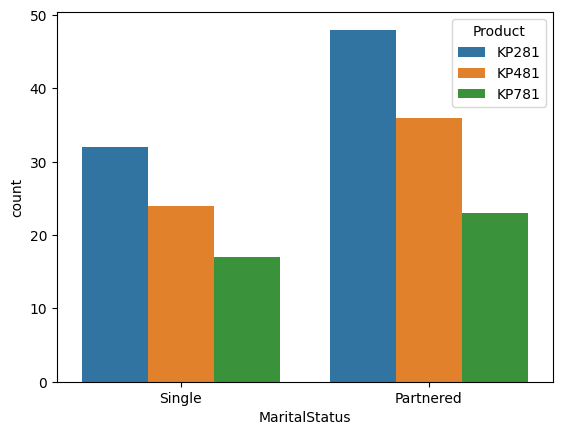

In [ ]:
#Countplot
#Comparisiom between maritalStatus and product.
sns.countplot(data=data, x="MaritalStatus", hue="Product")
plt.show()

**Observations:**
* Product Preference :
    1. Singles: KP281 is the most popular.
    2. Partnered: KP781 is slightly more popular than KP481.

* Usage:
   1. Singles use KP281 more frequently,  partnered individuals have a more balanced usage.

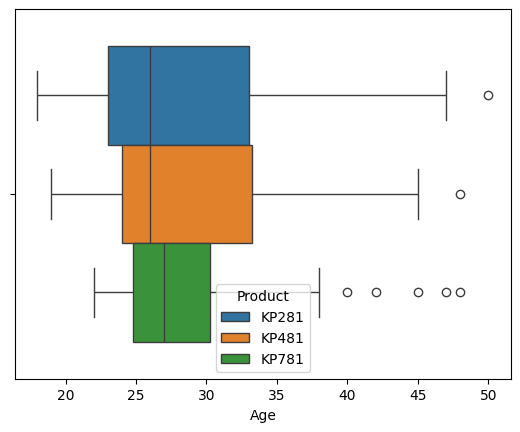

In [ ]:
#Boxplot
sns.boxplot(data=data, x="Age", hue="Product")
plt.show()

**Observations:**

* **Product Preference :**
    1. Younger customers (18-29)  higher preference is KP281.
    2. In the middle age range (30-49) balanced distribution among all three products.
* **Usage Patterns:**
    1. Younger customers tend to use treadmills more frequently, regardless of the product type.
    2. Usage patterns for different products are relatively similar across all age groups.


## **Univariate**

<ipython-input-38-aa922ac1b6b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Product', palette='YlGnBu')


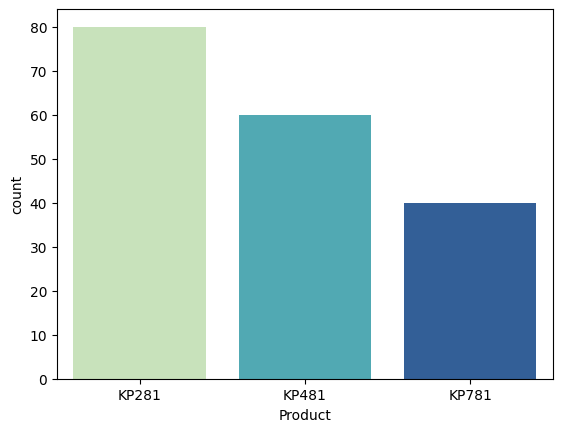

In [ ]:
#univariate
sns.countplot(data=data, x='Product', palette='YlGnBu')
plt.show()

**Observations:**
*  KP281 is the most purchased product count of 80.
*  KP481 is the second most purchased product, count of 60
*  KP781 is the purchased product having the count of 40.




<Axes: xlabel='MaritalStatus', ylabel='count'>

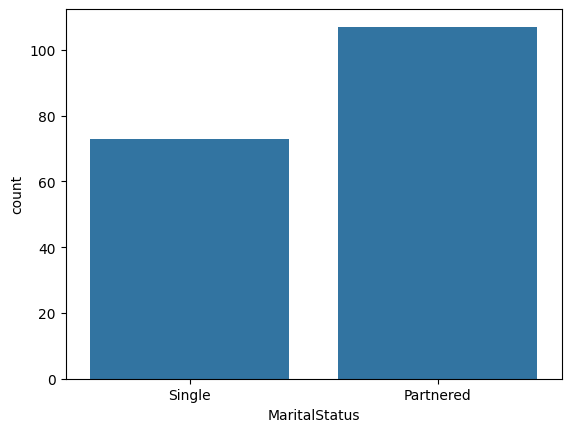

In [ ]:
#Count plot
sns.countplot(data=data, x='MaritalStatus')

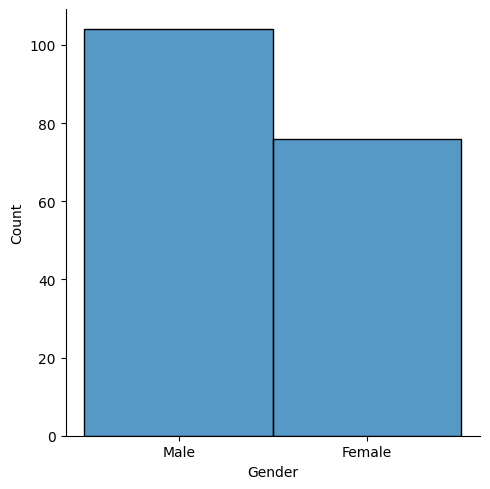

In [ ]:
#Displot
sns.displot(data=data, x='Gender')

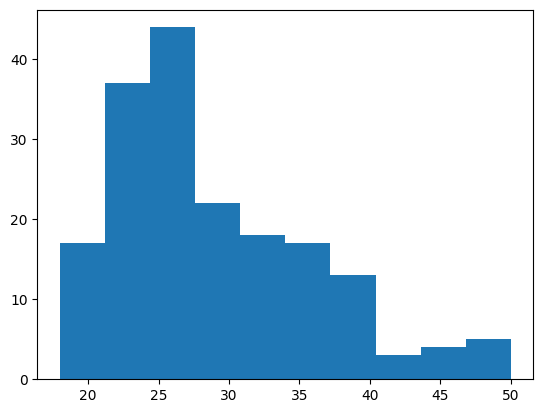

In [ ]:
#histogram
plt.hist(data["Age"])
plt.show()

<Axes: xlabel='Education', ylabel='count'>

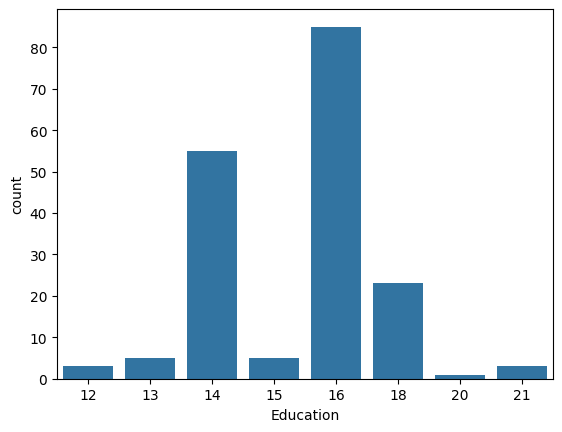

In [ ]:
#Countplot
sns.countplot(data=data,x='Education')

**Observations:**

From above visualizations using countplot, displot, histogram we can


observe,


*   **Product**: KP281 is the most purchased followed by KP481, KP781
*  **MaritalStatus:** couples are the most frequent buyers than singles.
*   **Gender :** Males are frequent buyer with count more than 100.
*   **Age :** Distribution of age is in bell-shaped, most of the customers are in middle age range.






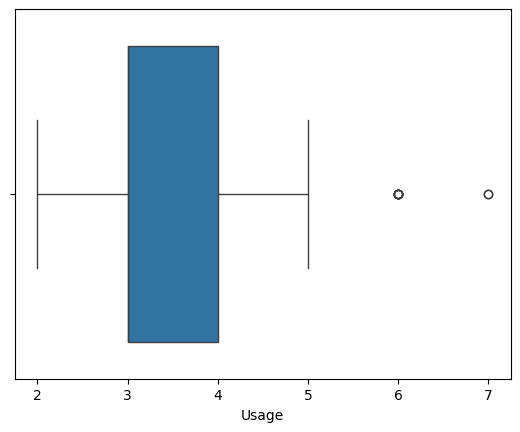

In [ ]:
#boxplot
sns.boxplot(data=data, x='Usage')
plt.show()

**Observations:**
1. Most of the customers use treadmill 3 - 4 times per week.
2. Very few people walk/run on treadmill 6 - 7 times per week (Outlier).

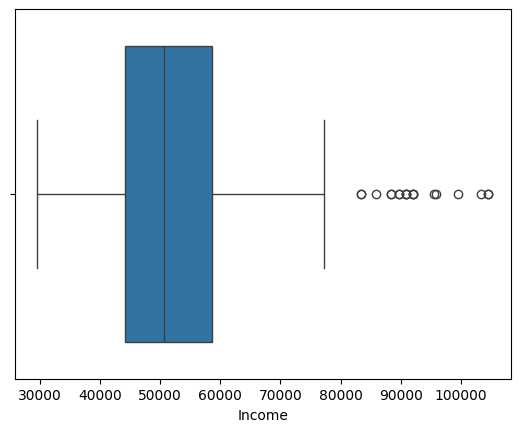

In [ ]:
#boxplot

sns.boxplot(data=data, x='Income')
plt.show()


**Observations:**
1. Most of the customers  income  is between 45K-60k
2. few people have income more than  85K-100k


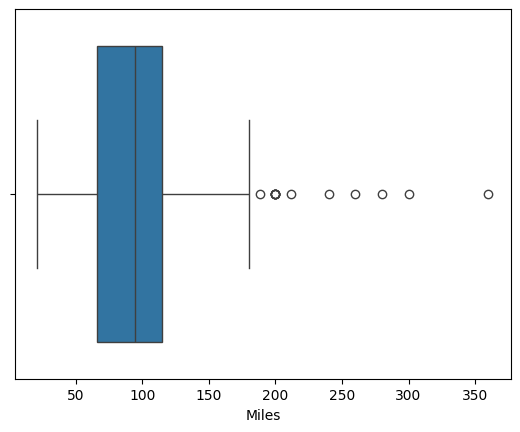

In [ ]:
#miles
sns.boxplot(data=data, x='Miles')
plt.show()


**Observations:**
1. Distance travelled by most of the customer on treadmill is between 75-120 Miles.
2. Very few people have travelled more than  200 Miles.{outliers}

# **Outliers**

In [ ]:
#Outliers in age
Age_data = data['Age']
Q1,Q2,Q3 = np.percentile(Age_data,25),np.percentile(Age_data,50),np.percentile(Age_data,75)
IQR = Q3 - Q1
W1,W2 = Q1-1.5*IQR,Q3+1.5*IQR
data[(data['Age']<W1) | (data['Age'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


<Axes: xlabel='Age'>

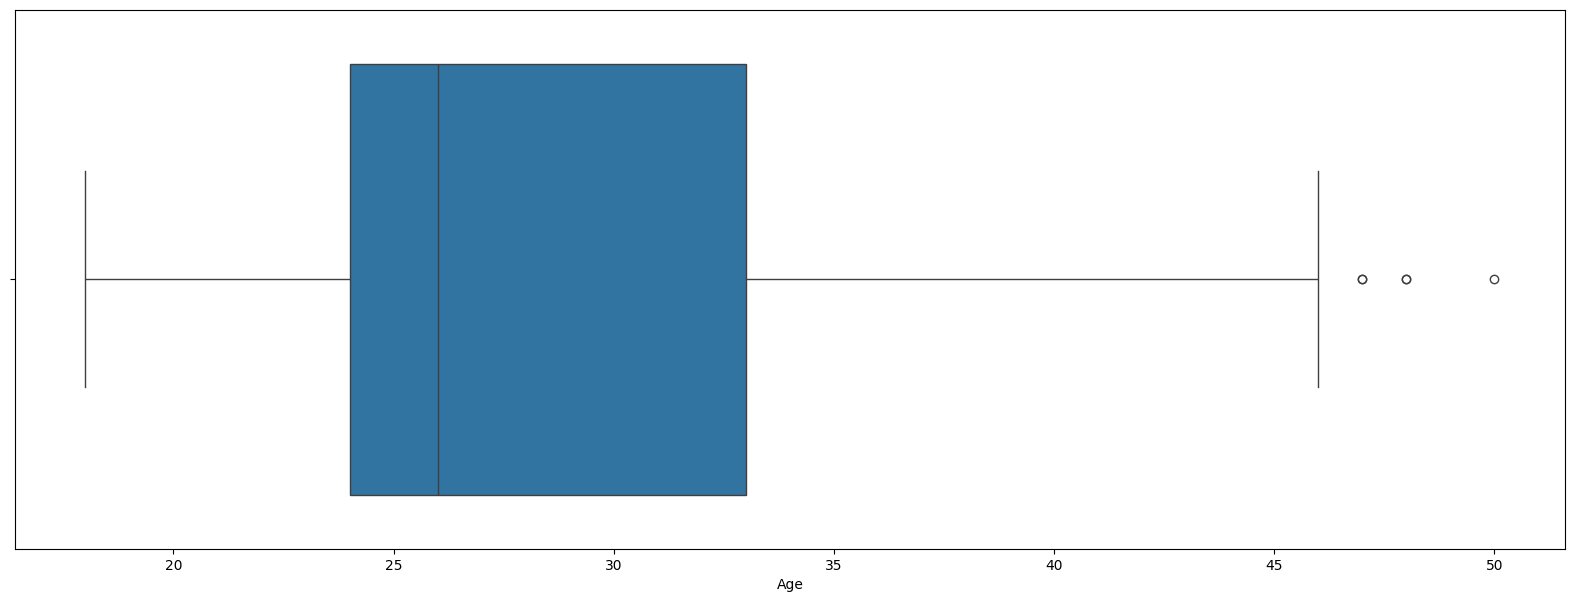

In [ ]:
sns.boxplot(x = data['Age'])

In [ ]:
#Outliers in income
income_data = data['Income']
Q1,Q2,Q3 = np.percentile(income_data,25),np.percentile(income_data,50),np.percentile(income_data,75)
IQR = Q3 - Q1
W1,W2 = Q1-1.5*IQR,Q3+1.5*IQR
data[(data['Income']<W1) | (data['Income'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


<Axes: xlabel='Income'>

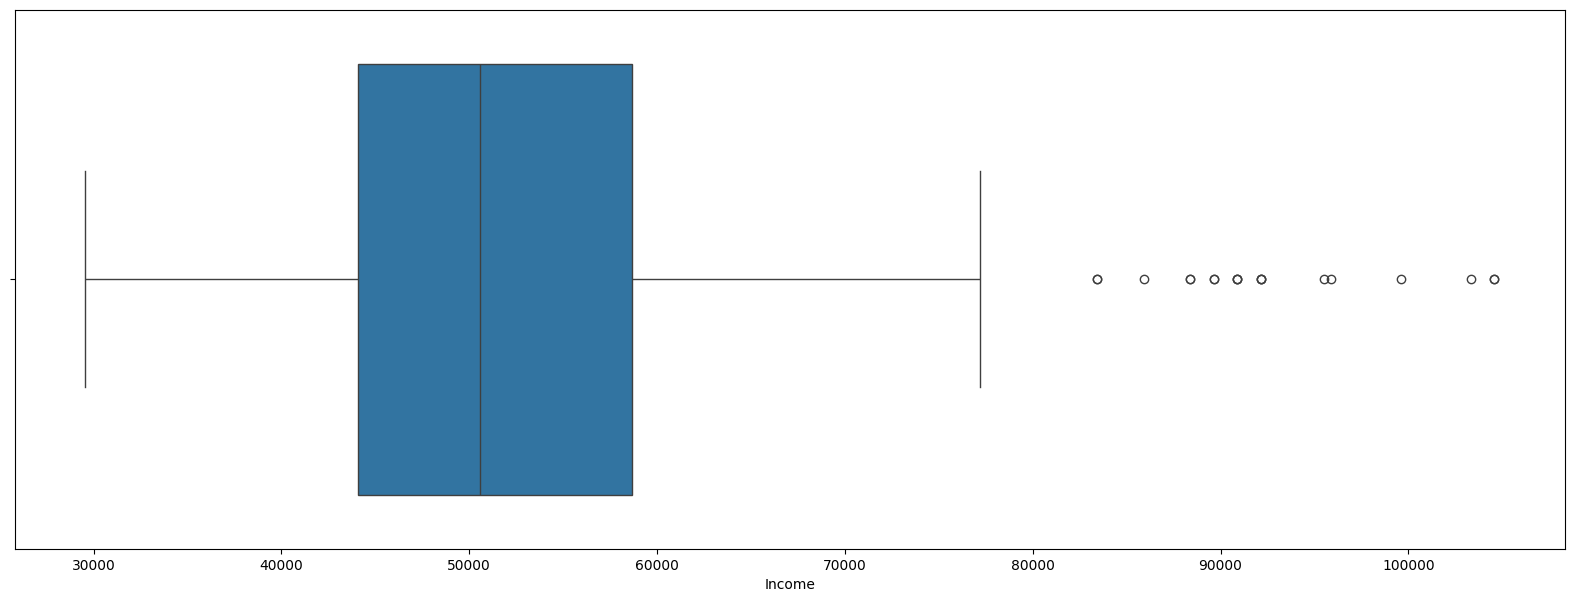

In [ ]:
#box-plot
sns.boxplot(x = data['Income'])

In [ ]:
#Outliers for education
Education_data = data['Education']
Q1,Q2,Q3 = np.percentile(Education_data,25),np.percentile(Education_data,50),np.percentile(Education_data,75)
IQR = Q3 - Q1
W1,W2 = Q1-1.5*IQR,Q3+1.5*IQR
data[(data['Education']<W1) | (data['Education'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


<Axes: xlabel='Education'>

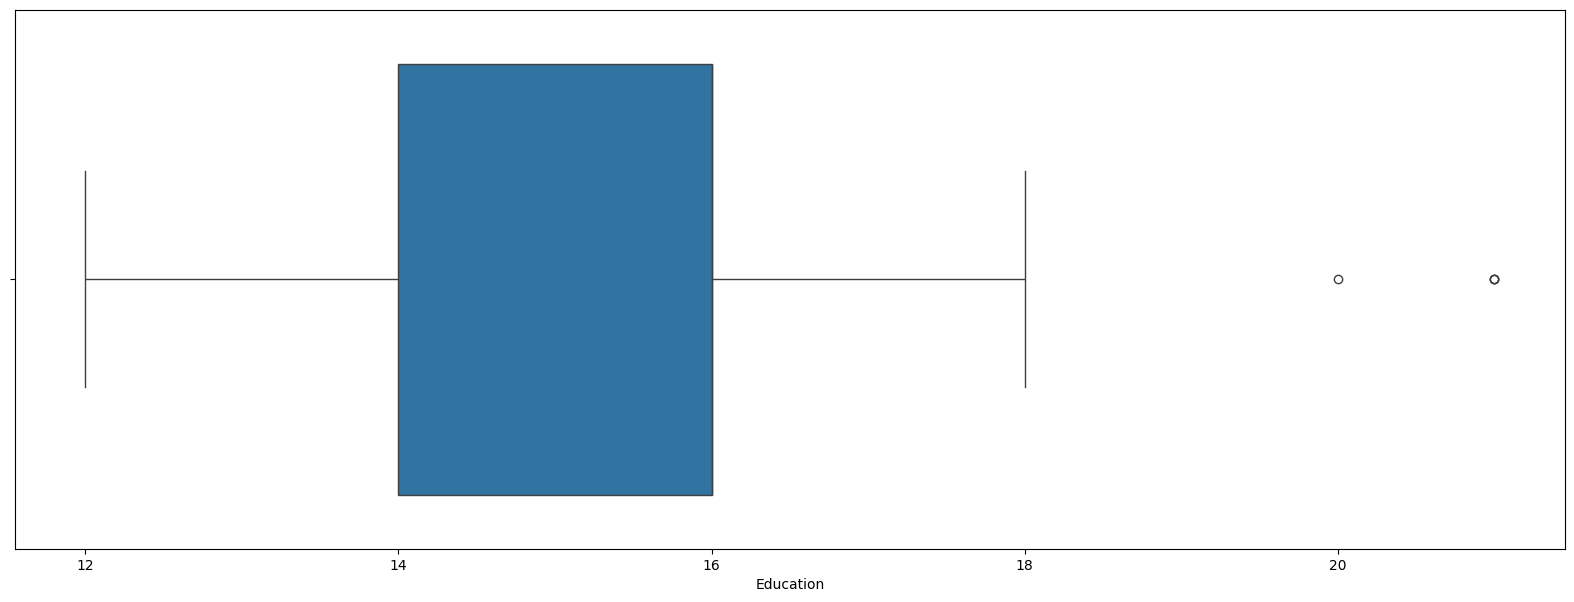

In [ ]:
#box-plot for education
sns.boxplot(x = data['Education'])

In [ ]:
#Outliers for fitness
Fitness_data = data['Fitness']
Q1,Q2,Q3 = np.percentile(Fitness_data,25),np.percentile(Fitness_data,50),np.percentile(Fitness_data,75)
IQR = Q3 - Q1
W1,W2 = Q1-1.5*IQR,Q3+1.5*IQR
data[(data['Fitness']<W1) | (data['Fitness'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


<Axes: xlabel='Fitness'>

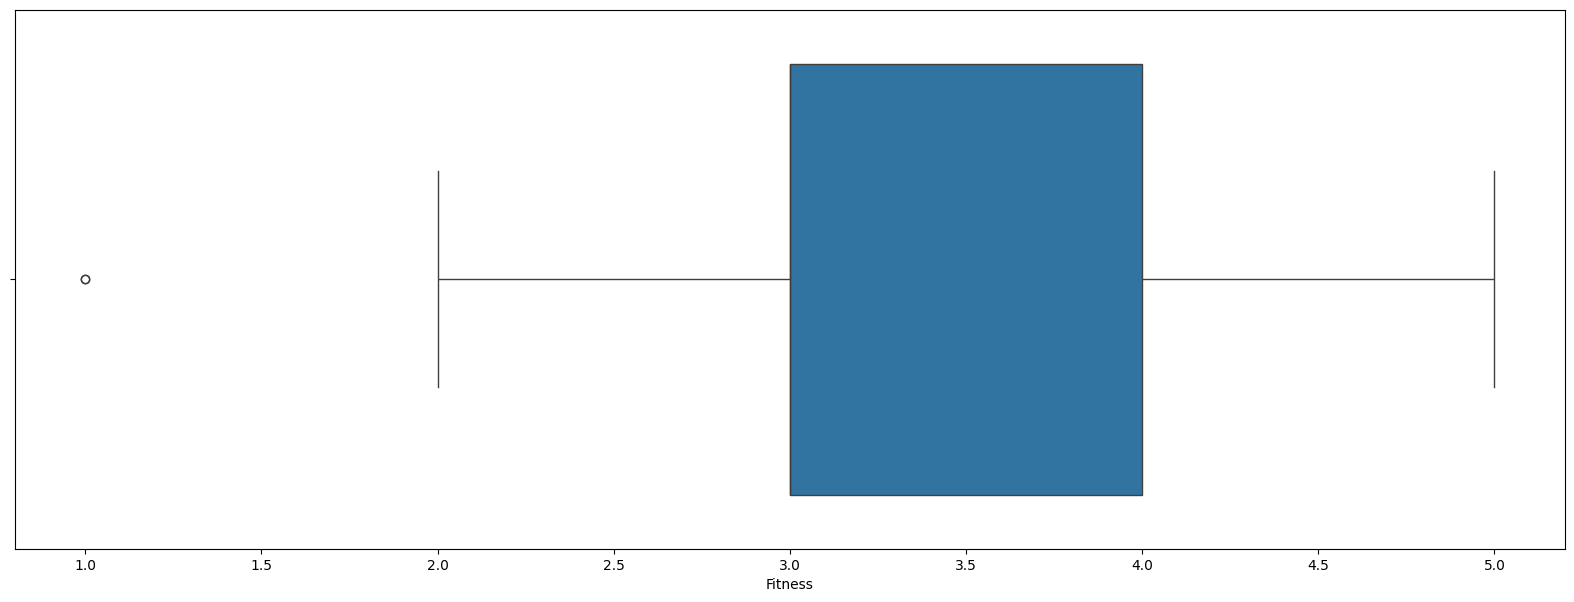

In [ ]:
#box-plot for fitness
sns.boxplot(x = data['Fitness'])

In [ ]:
#Outliers for miles
Miles_data = data['Miles']
Q1,Q2,Q3 = np.percentile(Miles_data,25),np.percentile(Miles_data,50),np.percentile(Miles_data,75)
IQR = Q3 - Q1
W1,W2 = Q1-1.5*IQR,Q3+1.5*IQR
data[(data['Miles']<W1) | (data['Miles'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


<Axes: xlabel='Miles'>

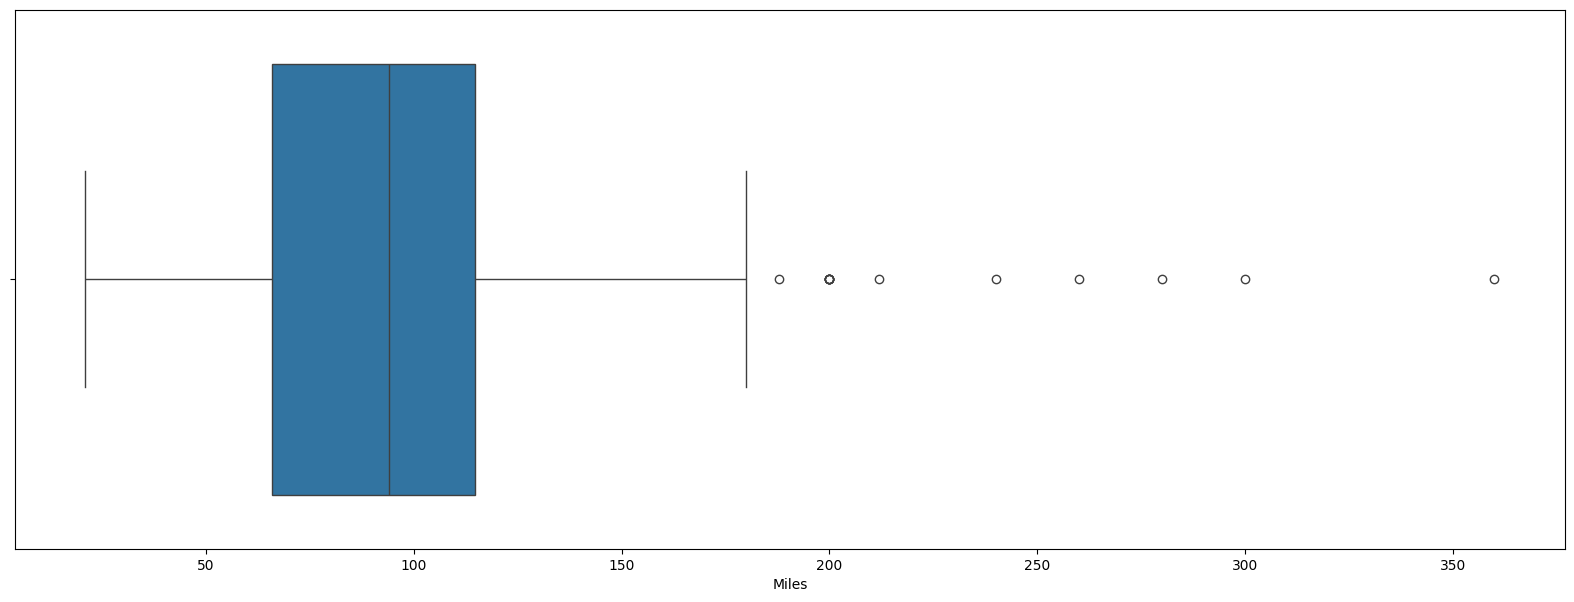

In [ ]:
#box-plot
sns.boxplot(x = data['Miles'])

In [ ]:
#Outliers for usage
Usage_data = data['Usage']
Q1,Q2,Q3 = np.percentile(Usage_data,25),np.percentile(Usage_data,50),np.percentile(Usage_data,75)
IQR = Q3 - Q1
W1,W2 = Q1-1.5*IQR,Q3+1.5*IQR
data[(data['Usage']<W1) | (data['Usage'] > W2)] # These are the outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


<Axes: xlabel='Usage'>

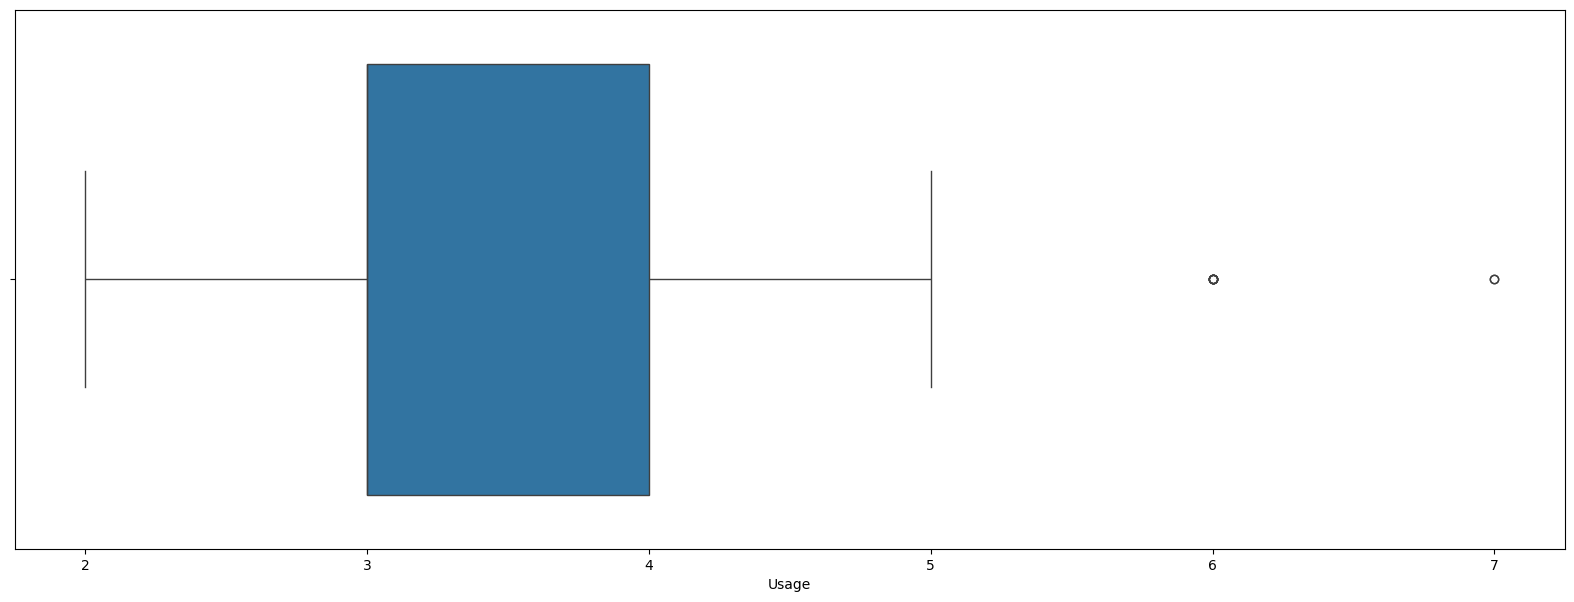

In [ ]:
#box-plot for usage
sns.boxplot(x =data['Usage'])

**Observations:**

# **Probability**

## **Marginal Probability**

In [ ]:
#Marginal Probability P(Product)
data['Product'].value_counts(normalize=True)


KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

**Observations:**

probability of buying the product
1.  P(Product=KP281) = 0.44.
2. P(Product=KP481) = 0.33.
3. P(Product=KP781) = 0.22.

In [ ]:
#Marginal Probability P(Gender)
data ['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

**Observation:**

Probability of customer is female or male
1.  P(Gender=Male) = 0.58.
2.  P(Gender=Female) = 0.42.


In [ ]:
#Marginal Probability P(MaritalStatus)
data['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

**Observations:**
1.  P(MaritalStatus=Partnered) = 0.60.
2.  P(MaritalStatus=Single) = 0.40.

In [ ]:
#Marginal Probability P(Fitness)
data['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

**Observations**

Probability of customer having fitness rating,
1. P(Fitness=3) = 0.53
2. P(Fitness=5) = 0.17
3. P(Fitness=2) = 0.14
4. P(Fitness=4) = 0.13
5. P(Fitness=1) = 0.01

In [ ]:
#Marginal Probability P(Usage)
data['Usage'].value_counts(normalize=True)


3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

**Observations:**
Probability of customer having usage,

P(Usage=3) = 0.38

P(Usage=4) = 0.29

P(Usage=2) = 0.18

P(Usage=5) = 0.09

P(Usage=6) = 0.03

P(Usage=7) = 0.01


In [ ]:
#cross tab
pd.crosstab(data["Gender"],data["Product"])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
#probability of customers buying KP281 treadmill?
80/180


0.4444444444444444

In [ ]:
#probability of customers buying KP781 treadmill?
40/180

0.2222222222222222

In [ ]:
#probability of customers buying KP781 treadmill?
40/180

0.2222222222222222

## **Conditional probability**

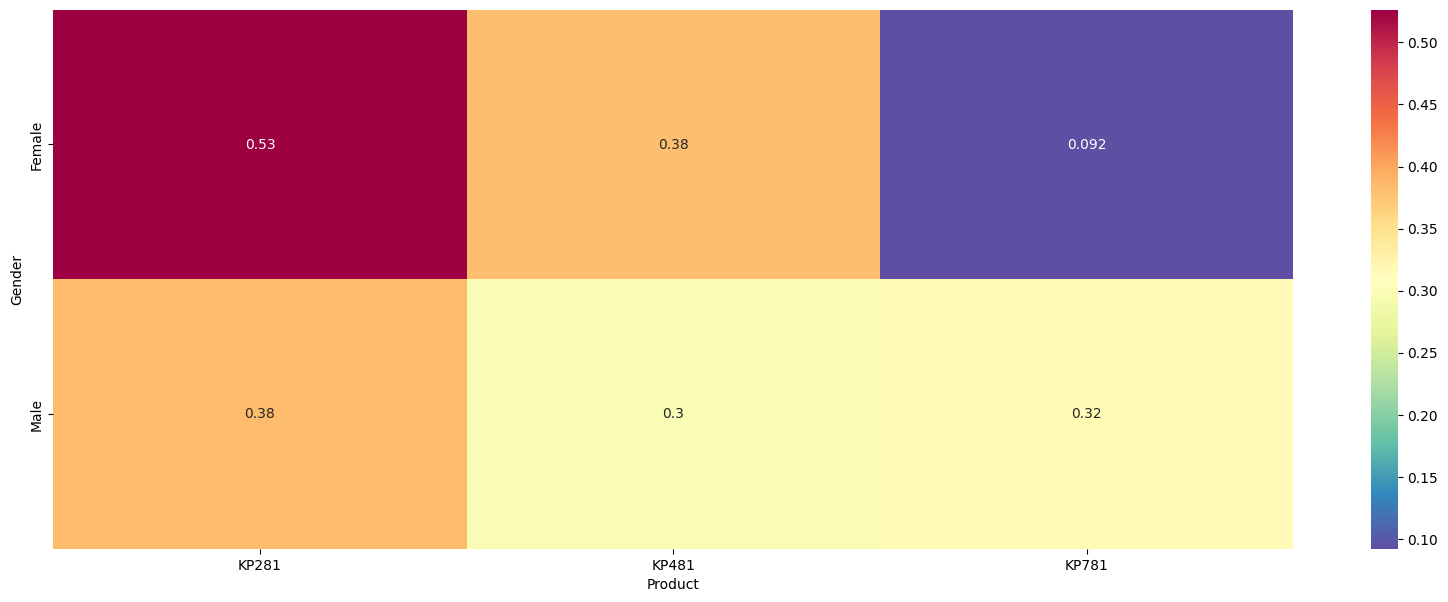

In [ ]:
#Conditional Probability, P(Product | Gender)

sns.heatmap(pd.crosstab(data['Gender'], data['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

**Observations:**
1.  P(Product=KP281 | Customer=Male) = 0.38.
2.  P(Product=KP481 | Customer=Male) = 0.3.
3. P(Product=KP781 | Customer=Male) = 0.32.
4. P(Product=KP281 | Customer=Female) = 0.53.
5. P(Product=KP481 | Customer=Female) = 0.38.
6.  P(Product=KP781 | Customer=Female) = 0.092.

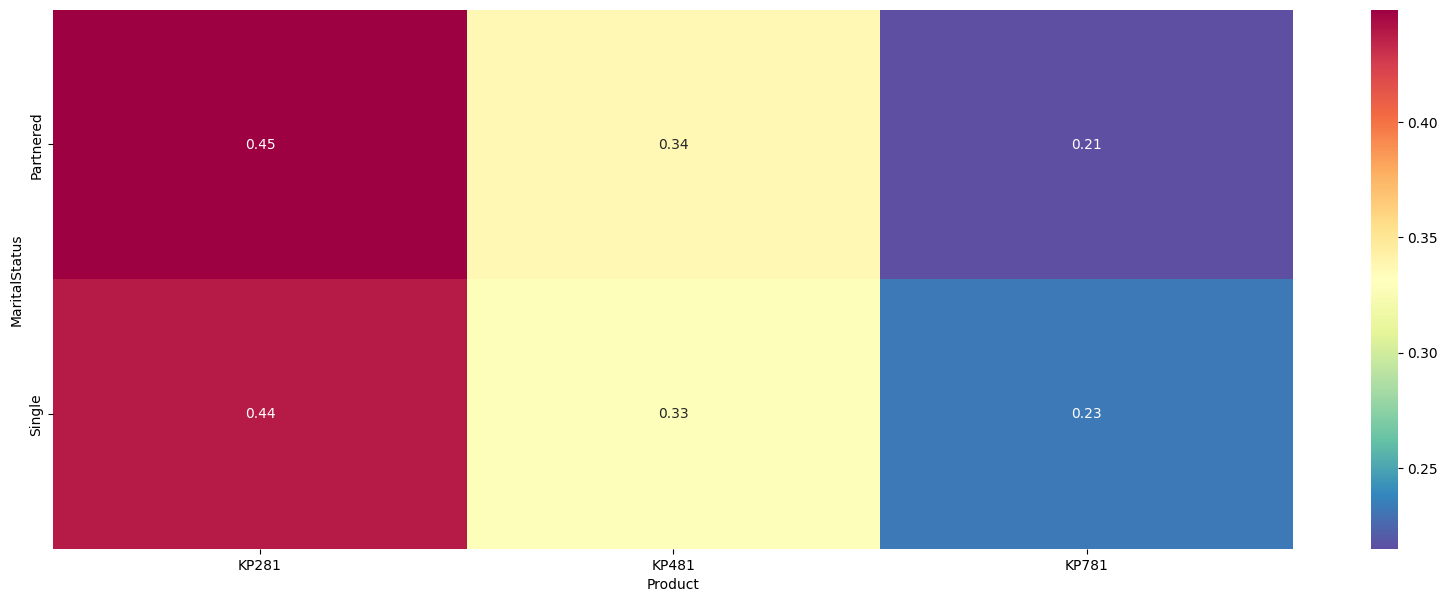

In [ ]:
# Conditional Probability, P(Product | MaritalStatus)
sns.heatmap(pd.crosstab(data['MaritalStatus'], data['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()


**Observations:**
1. (Product=KP281 | MaritalStatus=Single) = 0.44.
2.  P(Product=KP481 | MaritalStatus=Single) = 0.33.
3.  P(Product=KP781 | MaritalStatus=Single) = 0.23.
4.  P(Product=KP281 | MaritalStatus=Partnered) = 0.45.
5. P(Product=KP481 | MaritalStatus=partnered) = 0.34.
6. P(Product=KP781 | MaritalStatus=Partnered) = 0.21.

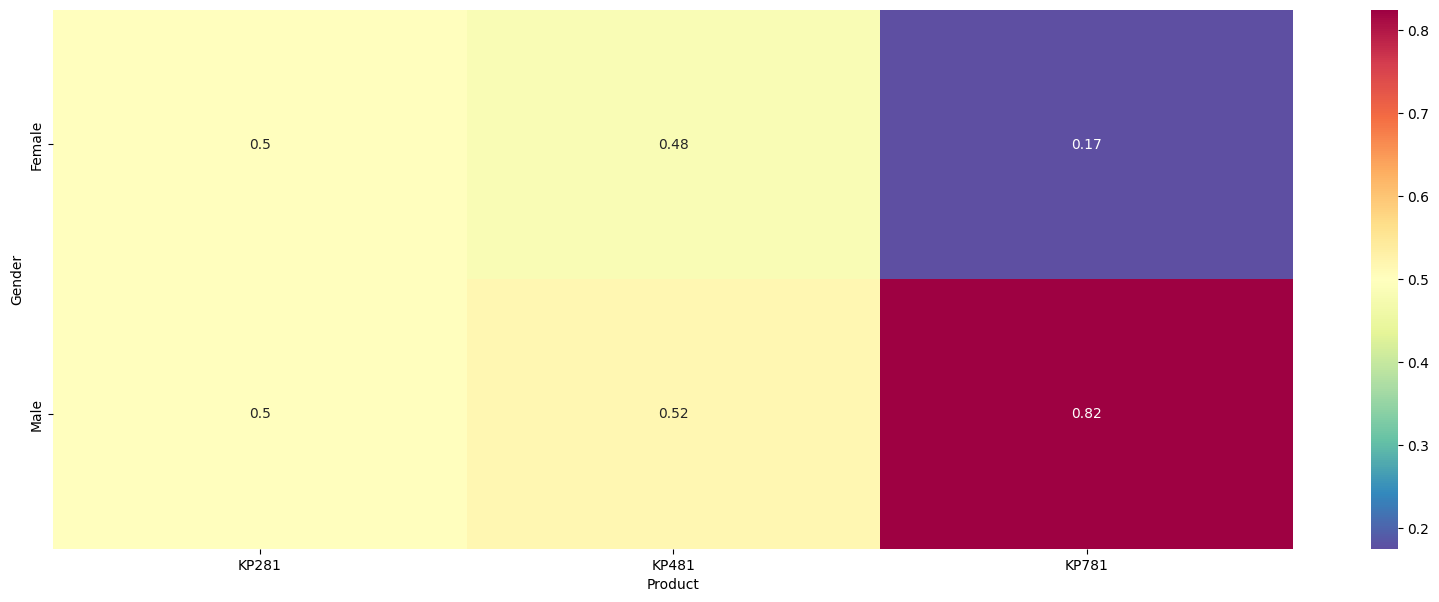

In [ ]:
#Conditional Probability, P(Gender | Product)

sns.heatmap(pd.crosstab(data['Gender'], data['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

**Observations:**
1.  P(Customer=Male | Producty=KP281) = 0.50.
3.  P(Customer=Male | Product=KP481) = 0.52.
5.  P(Customer=Male | Product=781) = 0.82.
2.  P(Customer=Female | Product=KP281) = 0.50.
4.  P(Customer=Female | Product=KP481) = 0.48.
6.  P(Customer=Female | Product=KP781) = 0.17.

## **Joint probability**

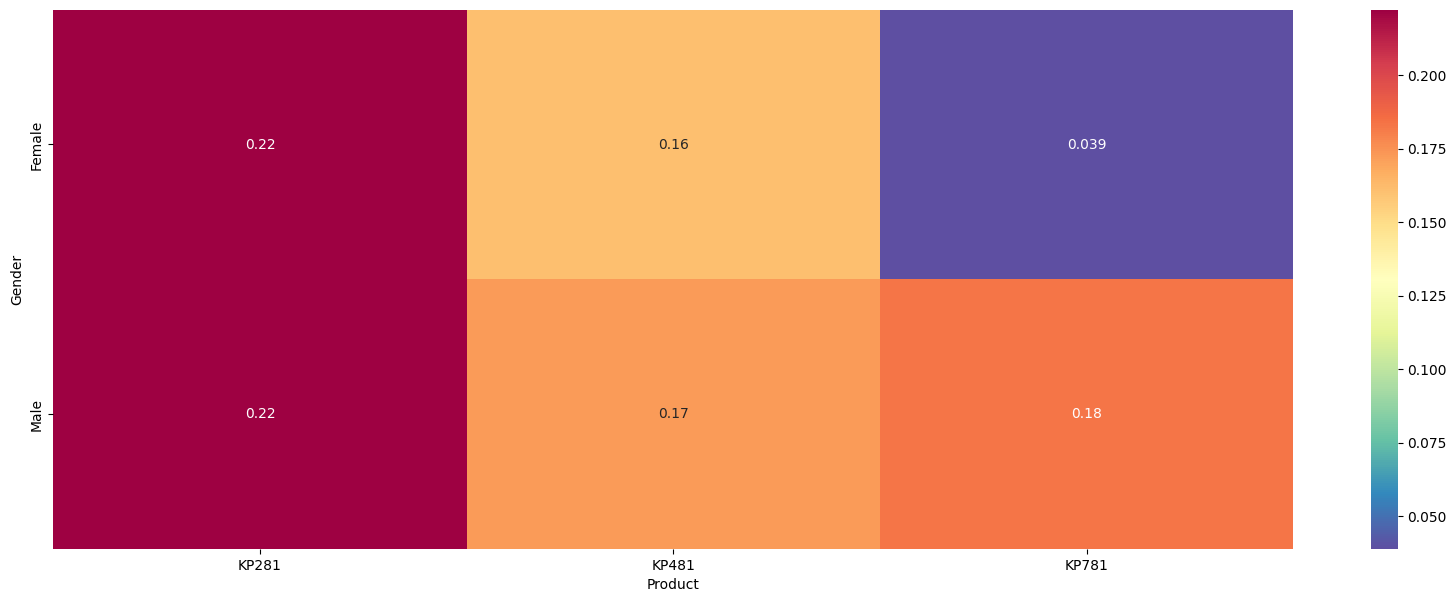

In [ ]:
#using heatmap
#Joint Probability, P(Product Intersection Gender)

sns.heatmap(pd.crosstab(data['Gender'], data['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

**Observations:**
1.  P(KP281 Intersection Male) = 0.22.
2.  P(KP481 Intersection Male) = 0.17.
3.  P(KP781 Intersection Male) = 0.18.
4.  P(KP281 5. Intersection Female) = 0.22.
5.  P(KP481 Intersection Female) = 0.16.
6.  P(KP781 Intersection Female) = 0.039.

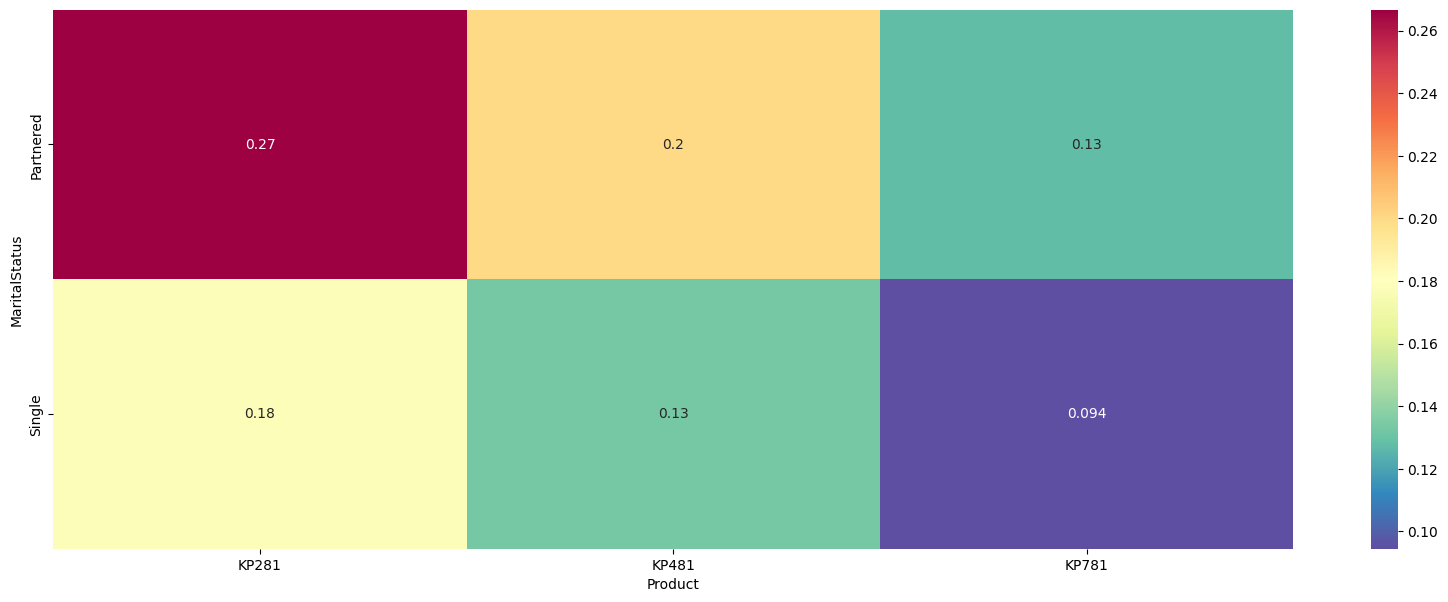

In [ ]:
#Joint Probability, P(Product Intersection MartialStatus)
#heatmap
sns.heatmap(pd.crosstab(data['MaritalStatus'], data['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

**Observations:**
1. P(KP281 Intersection Single) = 0.18.
2. P(KP481 Intersection Single) = 0.13.
3. P(KP781 Intersection Single) = 0.094.
4. P(KP281 Intersection Partnered) = 0.27.
5. P(KP481 Intersection Partnered) = 0.2.
6. P(KP781 Intersection Partnered) = 0.13.

# **Statistics for all features**

In [ ]:
data.mean()

<ipython-input-96-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [ ]:
data.median()

<ipython-input-97-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [ ]:
data.groupby('Product')['Fitness'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [ ]:
data.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
data.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

# **Customer-Profiling**

**Business insights from this case-study :**

**KP281:**

1. KP281 is the most purchased treadmill model,44.44% of the sales.
2. Both genders prefer KP281 model.
7. Fitness Scale - 2 to 4
6. Weekly Usage - 2 to 4 times
8. Weekly Running Mileage - 50 to 100 miles
5. Annual Income of customer below USD 60,000
4. Education level of customer 13 years and above
3. Mean income of customers buying KP281 is 46.4K dollars.
3. Age of customer mainly between 18 to 35 years with few between 35 to 50 years

**KP481 :**

1. KP481 is the second most product sold, 33.33% of sales.
2. Mean income of KP481 is 49K dollars.
7. Fitness Scale - 2 to 4
6. Weekly Usage - 2 to 4 times
8. Weekly Running Mileage - 50 to 200 miles
4. Education level of customer 13 years and above
5. Annual Income of customer between USD 40,000 to USD 80,000
3. Age of customer mainly between 18 to 35 years with few between 35 to 50 years

**KP781 :**

1. KP781 is a rare bought treadmill model because it is expensive.
7. Fitness Scale - 3 to 5
6. Weekly Usage - 4 to 7 times.
3. Age of customer between 18 to 35 years
8. Weekly Running Mileage - 100 miles and above.
2. Mean income of KP781 buyers is 75.4K dollars.
4. Education level of customer 15 years and above.
5. Annual Income of customer USD 80,000 and above.



# **Recommendations**


1. KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promote as budget treadmills.
2. Not many women here seem to like using exercise equipment. So, we should start a campaign to inspire women to exercise more.
3. Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.
4. We should research how to expand our market for customers beyond 50 years of age. We can recommend basic treadmill models (KP281/KP481) for starters.
5. Aerofit should spread the word about health and our products, especially to people who have studied for 15, 20, or 21 years. Education often links to how much money people make, and we've noticed that folks with 14 years of schooling have bought 11 times more machines (55 machines) than those with 15 years of schooling (5 machines).
6. There's a big difference in sales for the KP784 model—only 18% of all KP781 sales are to women. To get more women interested, we should offer them special deals and let them try out the product.
7. Provide personalized recommendations based on customer profiles to improve satisfaction.










In [2]:
!sudo apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
!git config --global user.name "sanjanaynvsdl"

In [4]:
!git config --global user.email "sanjanayalmarthi@gmail.com"